In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

# 過去データの入手

In [15]:
for i in df_kstart.ix[:, 2:3]:
    print(i)


category


In [3]:
# csvの読み込み kickstarter:二値分類, Car_Consum:線形回帰
df_kstart = pd.read_csv("data/ks-projects-201801.csv", encoding="utf-8")

display(df_kstart.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# 基礎集計、グラフ化

In [108]:
df_kstart.keys()

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [109]:
df_kstart = df_kstart.drop(columns=["ID", "name", "pledged", "usd pledged", "usd_pledged_real"])
df_kstart = pd.get_dummies(df_kstart, columns=['category']).fillna(0)
df_kstart = pd.get_dummies(df_kstart, columns=['main_category']).fillna(0)
df_kstart = pd.get_dummies(df_kstart, columns=['currency']).fillna(0)
df_kstart = pd.get_dummies(df_kstart, columns=['state']).fillna(0)
df_kstart = pd.get_dummies(df_kstart, columns=['country']).fillna(0)
#df_kstart_data = pd.concat([df_kstart_successful, df_kstart_failed]).drop(columns=["state_canceled", "state_live", "state_suspended", "state_undefined"], axis=1)

In [27]:
# pandas による処理
df_kstart.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [113]:
icolumn = [None]*2
icolumn[0] = df_kstart.columns.get_loc("state_successful")
icolumn[1] = df_kstart.columns.get_loc("state_failed")

196

In [115]:
test = df_kstart.corr()

In [120]:
test["state_successful"]

goal                        -0.024332
backers                      0.129109
usd_goal_real               -0.023052
category_3D Printing         0.000050
category_Academic           -0.015296
category_Accessories        -0.002831
category_Action             -0.019358
category_Animals            -0.005793
category_Animation          -0.014674
category_Anthologies         0.029606
category_Apparel            -0.045443
category_Apps               -0.080322
category_Architecture       -0.011090
category_Art                 0.017605
category_Art Books           0.026990
category_Audio              -0.005717
category_Bacon              -0.009189
category_Blues               0.004609
category_Calendars           0.002177
category_Camera Equipment    0.007475
category_Candles            -0.015887
category_Ceramics            0.004693
category_Children's Books   -0.001753
category_Childrenswear      -0.011740
category_Chiptune            0.008399
category_Civic Design        0.000353
category_Cla

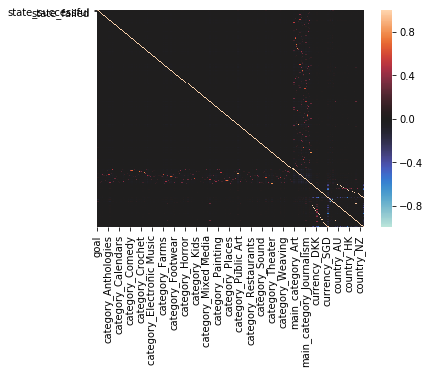

In [114]:
sns.heatmap(df_kstart.corr(), vmax=1, vmin=-1, center=0, yticklabels=["state_successful", "state_failed"])

In [91]:
df_kstart_successful = df_kstart_dummies[df_kstart_dummies["state_successful"]==1]
df_kstart_failed = df_kstart_dummies[df_kstart_dummies["state_failed"]==1]
df_kstart_data = pd.concat([df_kstart_successful, df_kstart_failed]).drop(columns=["state_canceled", "state_live", "state_suspended", "state_undefined"], axis=1)
df_kstart_data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_failed,state_successful
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,224,US,52375.00,52375.00,50000.00,0,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,16,US,1205.00,1205.00,1000.00,0,1
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,100,US,12700.00,12700.00,12500.00,0,1
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,761,GB,57763.78,121857.33,6469.73,0,1
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,7,US,250.00,250.00,250.00,0,1
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,624,US,34268.00,34268.00,20000.00,0,1
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,66,US,701.66,701.66,175.00,0,1
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,147,US,15827.00,15827.00,10000.00,0,1
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,571,CA,43203.25,42174.03,15313.04,0,1
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,27,GB,167.70,160.60,142.91,0,1


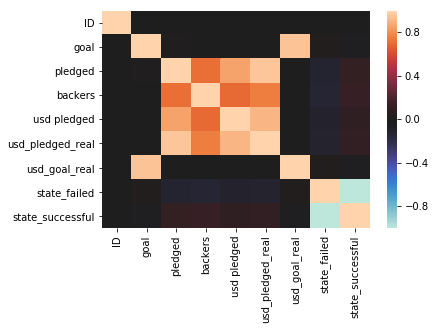

In [95]:
sns.heatmap(df_kstart_data.corr(), vmax=1, vmin=-1, center=0)

# データの前処理

In [ ]:
# 正規化、標準化、str to int

# 特徴量の設計・抽出

In [ ]:
# PCA による次元削減
# グラフから検討

# モデルの検討

In [ ]:
# 検索

# モデルの評価

In [ ]:
# 適当にPython
# RMSE:2乗の平均の平方根, MAE:絶対値の平均, MSE:2乗の平均, MAE:誤差の平均
# Recall, Precition, accuracy, day5:演習slide7　参照  

# モデルのチューニング

# 結果から検討

# モデルの決定

In [ ]:
# 保存

# 新しいデータを取得

In [ ]:
# あらかじめテストデータを作成しておく
# または適当に作る

# 学習済みモデルの更新

In [ ]:
# モデルにパラメータの割り当て？

# 予測

In [ ]:
# x.shape(N, x[:])
# y = model(x)

# 結果の評価

In [ ]:
# loss = y.loss()
# accuracy = y.accuracy()